# 分类准确度

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits() # 手写数字数据集
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

**数据集特征：**

    ：实例数：5620
    ：属性数：64
    ：属性信息：0x16范围内整数像素的8x8图像。
    ：缺少属性值：无
    ：创作者：E。Alpaydin（alpaydin'@'boun.edu.tr）
    ：日期：七月; 1998年

In [5]:
X = digits.data
X.shape

(1797, 64)

In [6]:
y = digits.target
y.shape

(1797,)

In [7]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [8]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
X[:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [10]:
X.shape # 1797个样本, 64个特征

(1797, 64)

In [11]:
some_digit  = X[666]

In [12]:
some_digit.shape

(64,)

In [13]:
some_digit

array([ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  0., 13., 15.,  9.,
       15.,  2.,  0.,  0.,  4., 16., 12.,  0., 10.,  6.,  0.,  0.,  8.,
       16.,  9.,  0.,  8., 10.,  0.,  0.,  7., 15.,  5.,  0., 12., 11.,
        0.,  0.,  7., 13.,  0.,  5., 16.,  6.,  0.,  0.,  0., 16., 12.,
       15., 13.,  1.,  0.,  0.,  0.,  6., 16., 12.,  2.,  0.,  0.])

In [14]:
some_digit_image = some_digit.reshape(8,8) # 将64个特征变成8,8的矩阵...
some_digit_image

array([[ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.],
       [ 0.,  0., 13., 15.,  9., 15.,  2.,  0.],
       [ 0.,  4., 16., 12.,  0., 10.,  6.,  0.],
       [ 0.,  8., 16.,  9.,  0.,  8., 10.,  0.],
       [ 0.,  7., 15.,  5.,  0., 12., 11.,  0.],
       [ 0.,  7., 13.,  0.,  5., 16.,  6.,  0.],
       [ 0.,  0., 16., 12., 15., 13.,  1.,  0.],
       [ 0.,  0.,  6., 16., 12.,  2.,  0.,  0.]])

In [15]:
import matplotlib
import matplotlib.pyplot as plt

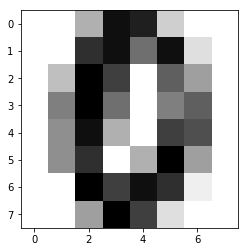

In [16]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary) # 画图
plt.show()

In [17]:
import sys
sys.path.append('..')
from kNNImpl.model_selection import train_test_split

In [18]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_ratio=0.6,seed=666)

In [19]:
from kNNImpl.kNN import KNNClassifier
my_clf = KNNClassifier(k=3) # k=3 有点慢.
my_clf.fit(X_train,y_train)
predict_y = my_clf.predict(X_test)
predict_y

array([8, 1, 3, ..., 8, 2, 3])

In [20]:
np.sum(predict_y == y_test) # 预测正确的数量

1054

In [21]:
y_test.shape

(1078,)

In [22]:
np.sum(predict_y == y_test) / len(y_test)

0.9777365491651205

## 封装我们自己的accuracy_score

In [23]:
from kNNImpl.metric import accuracy_score

In [24]:
accuracy_score(predict_y,y_test)

0.9777365491651205

In [25]:
my_clf.score(X_test,y_test)

0.9777365491651205

# sklearn中的score

In [26]:
%time 
my_clf.score(X_test,y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


0.9777365491651205

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=  6)
knn_clf.fit(X_train,y_train)
y_predict = knn_clf.predict(X_test) # 根据特征来预测结果

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_predict,y_test) # sklearn的查准率方法

0.9844444444444445

In [32]:
%time
knn_clf.score(X_test,y_test)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


0.9844444444444445